# Salary Prediction

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset From CSV File

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
print("Dataset Size :",dataset.shape)
dataset.head()

Dataset Size : (30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Visualizaing Dataset

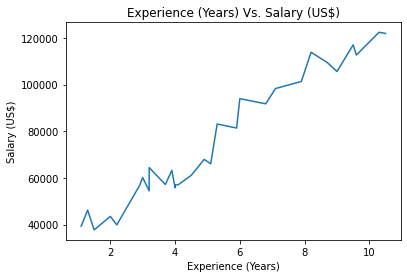

In [3]:
plt.plot(dataset['YearsExperience'].values,dataset['Salary'].values)
plt.title('Experience (Years) Vs. Salary (US$)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (US$)')
plt.show()

## Independent Variable (X)

In [4]:
X = dataset.iloc[:,0].values
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

## Dependent Variable (y)

In [5]:
y = dataset.iloc[:,-1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Splitting Dataset Into Training and Test Set

In [6]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2)

In [7]:
X_train

array([ 5.9,  3. ,  7.9,  6.8,  6. ,  8.2,  2. ,  1.3, 10.3,  3.2,  8.7,
        5.3,  2.9,  1.1,  3.9,  4. ,  3.7,  2.2,  7.1,  5.1,  4. , 10.5,
        9. ,  9.6])

In [8]:
X_test

array([4.9, 4.1, 3.2, 4.5, 1.5, 9.5])

In [9]:
y_train

array([ 81363.,  60150., 101302.,  91738.,  93940., 113812.,  43525.,
        46205., 122391.,  54445., 109431.,  83088.,  56642.,  39343.,
        63218.,  55794.,  57189.,  39891.,  98273.,  66029.,  56957.,
       121872., 105582., 112635.])

In [10]:
y_test

array([ 67938.,  57081.,  64445.,  61111.,  37731., 116969.])

## Creating Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [12]:
print("Linear Regression Model Score :",model.score(X_test.reshape(-1,1),y_test))

Linear Regression Model Score : 0.9377411098582193


## Predicting Result Values

In [13]:
y_predicted = model.predict(X_test.reshape(-1,1))
y_predicted

array([ 72611.48167288,  65114.20848986,  56679.77615896,  68862.84508137,
        40748.07064504, 115720.80247526])

## Results

In [14]:
results = pd.DataFrame({'Experience (Years)':X_test,'Predicted Salary (US$)':y_predicted})
results

,Experience (Years),Predicted Salary (US$)
0,4.9,72611.481673
1,4.1,65114.208490
2,3.2,56679.776159
3,4.5,68862.845081
4,1.5,40748.070645
5,9.5,115720.802475


## Visualizing Training Set Results

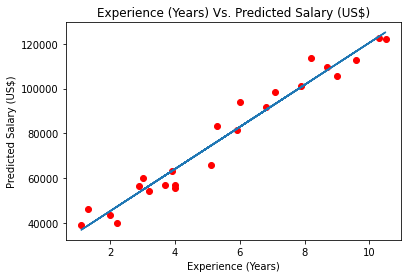

In [15]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train.reshape(-1,1)))
plt.title('Experience (Years) Vs. Predicted Salary (US$)')
plt.xlabel('Experience (Years)')
plt.ylabel('Predicted Salary (US$)')
plt.show()

## Visualizing Test Set Results

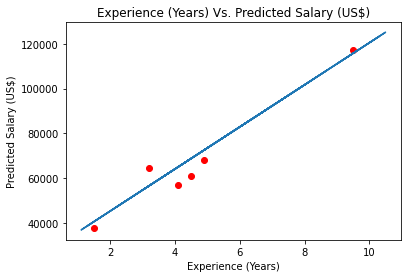

In [16]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,model.predict(X_train.reshape(-1,1)))
plt.title('Experience (Years) Vs. Predicted Salary (US$)')
plt.xlabel('Experience (Years)')
plt.ylabel('Predicted Salary (US$)')
plt.show()

## Exporting Model

In [17]:
import joblib
joblib.dump(model,'salary-prediction-model')

['salary-prediction-model']